<a href="https://colab.research.google.com/github/SebastianHV/California_Housing_Prices/blob/main/California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Predicting California Housing Prices with Linear Regression**

Objective: To build a linear regression model to predict the median house value in California districts based on various features. This project demonstrates an end-to-end machine learning workflow, from data loading and exploration to model training and evaluation.

## *1. Setup & Data Loading*

In [ ]:
# 1. Setup & Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target # Defining target variable/feature: Median House Value in $100,000s


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## *2. Exploratory Data Analysis (EDA)*

In [ ]:
# 2. Exploratory Data Analysis (EDA)

print('Print first rows of the dataset:')
print(df.head())
print('Information aboput the dataset:')
print(df.info())
print('Description of the dataset (Descriptive statistics):')
print(df.describe())

Print first rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Information aboput the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  

In [ ]:
# Check for missing values
print('Missing values in each column:')
print(df.isnull().sum())

Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


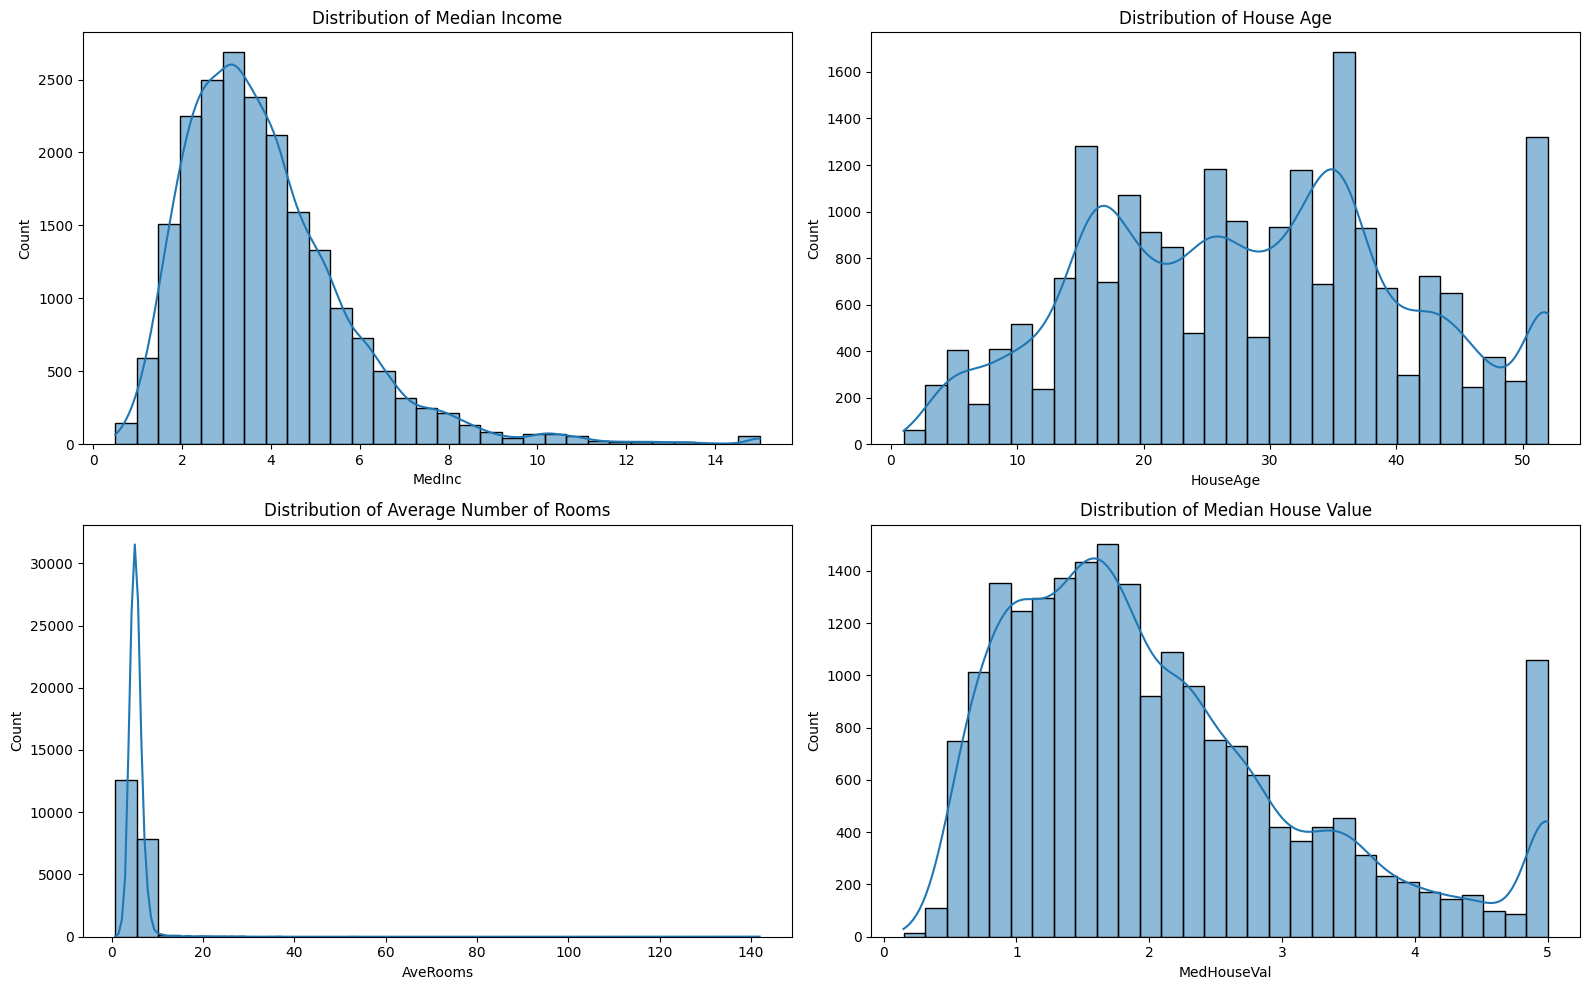

In [ ]:
# Visualize distributions of some key features and the target variable
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['MedInc'], kde=True, bins=30)
plt.title('Distribution of Median Income')

plt.subplot(2, 2, 2)
sns.histplot(df['HouseAge'], kde=True, bins=30)
plt.title('Distribution of House Age')

plt.subplot(2, 2, 3)
sns.histplot(df['AveRooms'], kde=True, bins=30)
plt.title('Distribution of Average Number of Rooms')

plt.subplot(2, 2, 4)
sns.histplot(df['MedHouseVal'], kde=True, bins=30)
plt.title('Distribution of Median House Value')

plt.tight_layout()
plt.show()

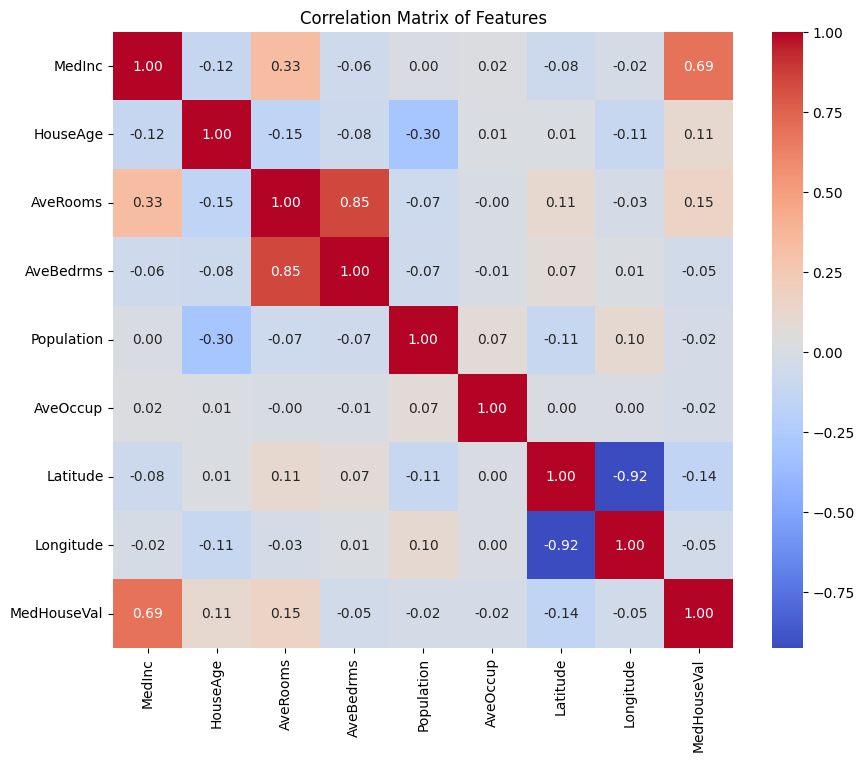

In [ ]:
# Explore relationships: Correalation matrix
# A correlation matrix is essential in machine learning for understanding
# relationships between variables and optimizing model building. By visualizing
# these relationships, it helps identify potential multicollinearity, guides
# feature selection, and can even inform feature engineering, leading to more
# efficient and accurate models.
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

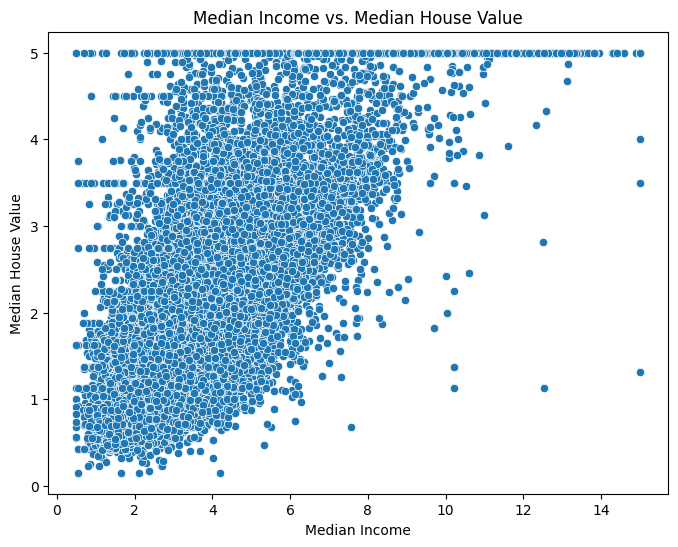

In [ ]:
# Scatter plot of Median Income vs Median House Value (there is a strong
# correlation detected in the matrix above)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

## *3. Data Preprocessing (Minimal for this dataset with Linear Regression)*

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# For this project, we'll proceed without explicit scaling to keep it simpler,
# as Linear Regression is less sensitive to feature scaling than distance-based algorithms.

## *4. Feature Selection*

In [ ]:
# Based on EDA (especially correlation matrix), 'MedInc' seems highly correlated.
# For this project, we'll use all available features initially.
# Define Features
X = df.drop('MedHouseVal', axis=1)
# Define Target
y = df['MedHouseVal']

## *5. Train-Test Split*

In [ ]:
# We regularly split data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# The random state ansure reproducibility

In [ ]:
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (16512, 8)
Shape of X_test: (4128, 8)
Shape of y_train: (16512,)
Shape of y_test: (4128,)


## *6. Model Training*

In [ ]:
# We call the model object/instance
model = LinearRegression()
# This line is where the actual training of the model happens. The .fit() method
# is a common method in scikit-learn models used to train the model.
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Print the coefficients (weights for each feature) and intercept
print("\nModel Coefficients:")
print(pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']))
# The model.intercept_ attribute stores the value where the regression
# line crosses the y-axis when all feature values are zero. It represents the
# baseline predicted value of the target variable when none of the features have
# any influence.
print(f"\nModel Intercept: {model.intercept_}")
# Together, the coefficients and the intercept define the linear equation that
# the model uses to make predictions. Understanding these values can provide
# insights into how each feature contributes to the predicted median house
# value. For example, a positive coefficient for a feature suggests that as the
# value of that feature increases, the predicted median house value also tends
# to increase.


Model Coefficients:
            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708

Model Intercept: -37.02327770606409


## *7. Prediction*

In [ ]:
y_pred = model.predict(X_test)

## *8. Model Evaluation*

In [ ]:
# MAE: Average absolute difference between predicted and actual values.
# A lower MAE indicates a better-performing model.
mae = metrics.mean_absolute_error(y_test, y_pred)
# MSE: Average of the squares of the errors. Penalizes larger errors more.
# A lower MSE is desirable.
mse = metrics.mean_squared_error(y_test, y_pred)
# RMSE: Square root of MSE, interpretable in the same units as the target variable.
# It represents the standard deviation of the prediction errors. A lower RMSE
# indicates better model performance.
rmse = np.sqrt(mse)
# R²: Proportion of the variance in the dependent variable that is predictable from the independent variable(s).
# Ranges from 0 to 1 (or can be negative for very poor models). Higher is
# generally better. An R² of 0.60 means that 60% of the variance in Median
# House Value can be explained by the features in our model.
r2 = metrics.r2_score(y_test, y_pred)

In [ ]:
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75
R-squared (R²): 0.58


## *9. Visualization of Results*

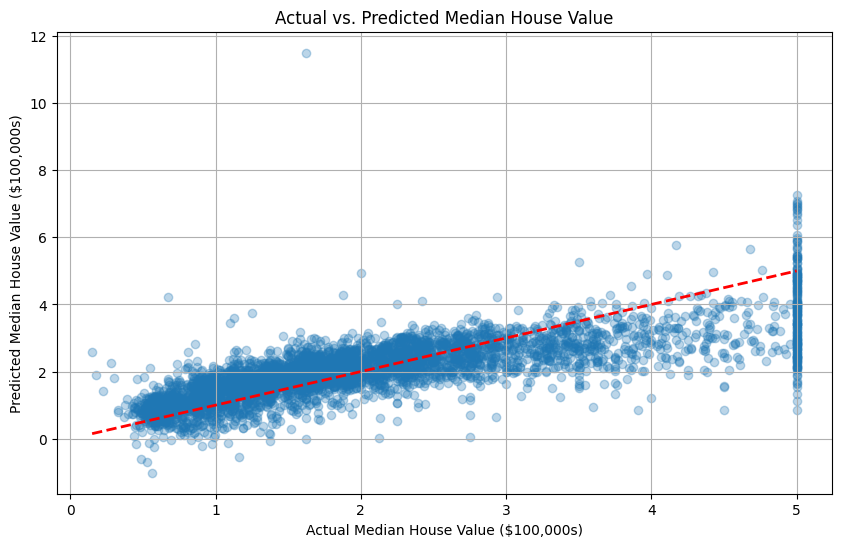

In [ ]:
# Comparing the actual median house values from the test set with the values predicted by the model.
# The primary purpose is to visually inspect how well the predicted values
# (y_pred) align with the actual values (y_test). If the model is performing
# well, the points on the scatter plot should be clustered closely around the
# red diagonal line (y = x).
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2) # Diagonal line
plt.xlabel('Actual Median House Value ($100,000s)')
plt.ylabel('Predicted Median House Value ($100,000s)')
plt.title('Actual vs. Predicted Median House Value')
plt.grid(True)
plt.show()

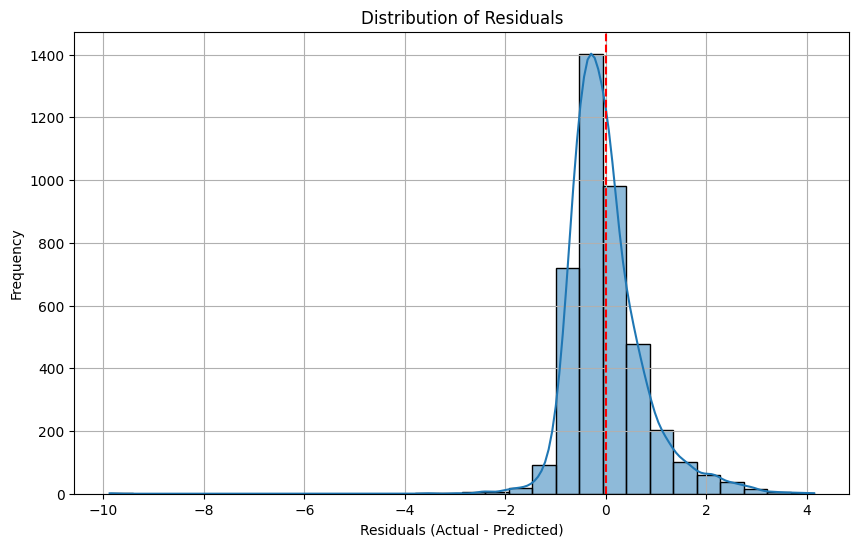

In [ ]:
# Residual Plot (Difference between actual and predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()
# Ideally, residuals should be normally distributed around zero.